In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy import stats
%matplotlib inline

import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


In [118]:

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [119]:
# remove value if percentage of missing value is greater than 60%
train_nulldata = train_data.isna().sum() / train_data.shape[0]


In [120]:
# remove value if percentage of missing value is greater than 60% in test set
test_nulldata = test_data.isna().sum() / test_data.shape[0]


In [121]:
# Dropping from train
train_data.drop(train_nulldata[train_nulldata > 0.6].index, axis = 1, inplace = True)

In [122]:
# Drop from test
test_data.drop(test_nulldata[test_nulldata > 0.6].index, axis = 1, inplace = True)

In [123]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [124]:
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())

In [125]:
# all missing data with mode
train_data['BsmtCond'] = train_data['BsmtCond'].fillna(train_data['BsmtCond'].mode()[0])
train_data['GarageType'] = train_data['GarageType'].fillna(train_data['GarageType'].mode()[0])
train_data['BsmtQual'] = train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0])
train_data['GarageFinish']=train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode()[0])
train_data['GarageQual']=train_data['GarageQual'].fillna(train_data['GarageQual'].mode()[0])
train_data['MasVnrType']=train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode()[0])
train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna(train_data['FireplaceQu'].mode()[0])
train_data['MasVnrArea']=train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mode()[0])
train_data['GarageCond']=train_data['GarageCond'].fillna(train_data['GarageCond'].mode()[0])
train_data.drop(['GarageYrBlt'],axis=1,inplace=True)

In [126]:
train_data.shape

(1460, 76)

In [127]:
#drop Id as it does not have any relation and is just a index
train_data.drop(['Id'],axis=1,inplace=True)

In [128]:
#handling nulls in test dataset
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 76, dtype: int64

In [129]:
test_data['LotFrontage'] = test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean())
test_data['BsmtCond'] = test_data['BsmtCond'].fillna(test_data['BsmtCond'].mode()[0])
test_data['GarageType'] = test_data['GarageType'].fillna(test_data['GarageType'].mode()[0])
test_data['BsmtQual'] = test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode()[0])

In [130]:
test_data.head(6)
test_data.shape

(1459, 76)

In [131]:
# doing the same for null values in test set
test_data.drop(['GarageYrBlt'],axis=1,inplace=True)
test_data['GarageFinish']=test_data['GarageFinish'].fillna(test_data['GarageFinish'].mode()[0])
test_data['GarageQual']=test_data['GarageQual'].fillna(test_data['GarageQual'].mode()[0])
test_data['GarageCond']=test_data['GarageCond'].fillna(test_data['GarageCond'].mode()[0])
test_data['MSZoning'] = test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0])
test_data['MasVnrType']=test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0])
test_data['MasVnrArea']=test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mode()[0])

In [132]:
# replacing the missing data
test_data['Utilities']=test_data['Utilities'].fillna(test_data['Utilities'].mode()[0])
test_data['Exterior1st']=test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode()[0])
test_data['SaleType']=test_data['SaleType'].fillna(test_data['SaleType'].mode()[0])
test_data['KitchenQual']=test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode()[0])
test_data['Exterior2nd']=test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].mode()[0])
test_data['BsmtFinType1']=test_data['BsmtFinType1'].fillna(test_data['BsmtFinType1'].mode()[0])
test_data['BsmtFinSF1']=test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].mean())
test_data['GarageArea']=test_data['GarageArea'].fillna(test_data['GarageArea'].mean())
test_data['GarageCars']=test_data['GarageCars'].fillna(test_data['GarageCars'].mean())




In [ ]:
#handling missing data in test data set
test_data['BsmtFinType2']=test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].mode()[0])
test_data['BsmtExposure']=test_data['BsmtExposure'].fillna(test_data['BsmtExposure'].mode()[0])
test_data['BsmtFinSF2']=test_data['BsmtFinSF2'].fillna(test_data['BsmtFinSF2'].mean())
test_data['BsmtUnfSF']=test_data['BsmtUnfSF'].fillna(test_data['BsmtUnfSF'].mean())
test_data['TotalBsmtSF']=test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].mean())
test_data['BsmtFullBath']=test_data['BsmtFullBath'].fillna(test_data['BsmtFullBath'].mode()[0])
test_data['BsmtHalfBath']=test_data['BsmtHalfBath'].fillna(test_data['BsmtHalfBath'].mode()[0])
test_data['Functional']=test_data['Functional'].fillna(test_data['Functional'].mode()[0])



In [133]:

test_data.shape

(1459, 75)

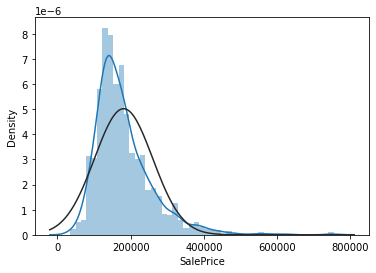

In [134]:
#skewness in target variable
sns.distplot(train_data['SalePrice'], fit=norm);

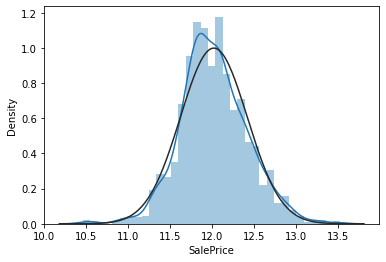

In [135]:
#removing the skewness from Sales price using logarithmic transformation
sns.distplot(np.log1p(train_data['SalePrice']), fit=norm);

In [136]:
#get all numeric attributes for heatmap
train_corralition = train_data.select_dtypes(include=[np.number])

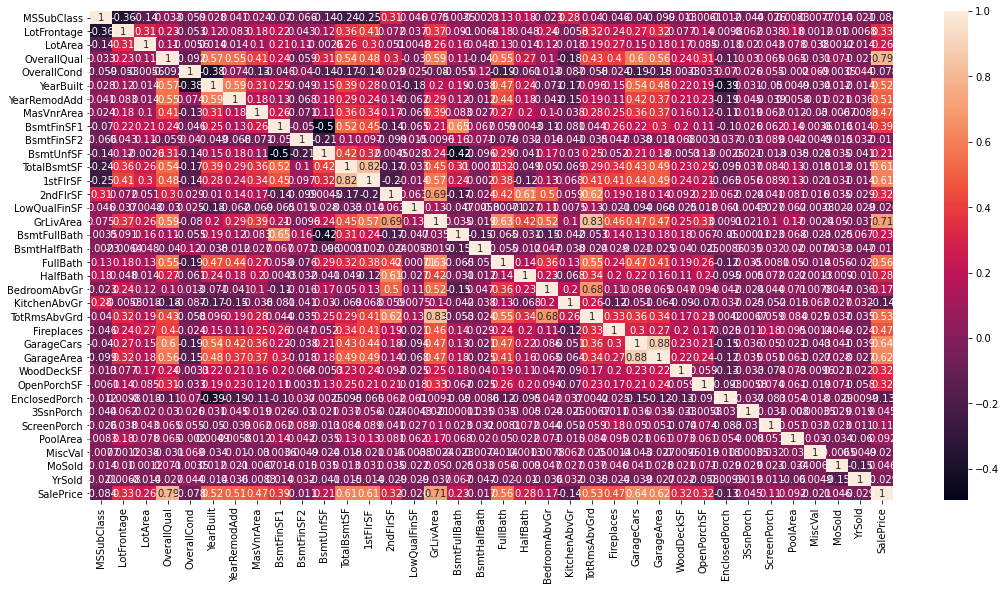

In [137]:
#Coralation plot
data_corraltion = train_corralition.corr()
plt.subplots(figsize=(18,9))
sns.heatmap(data_corraltion, annot=True)

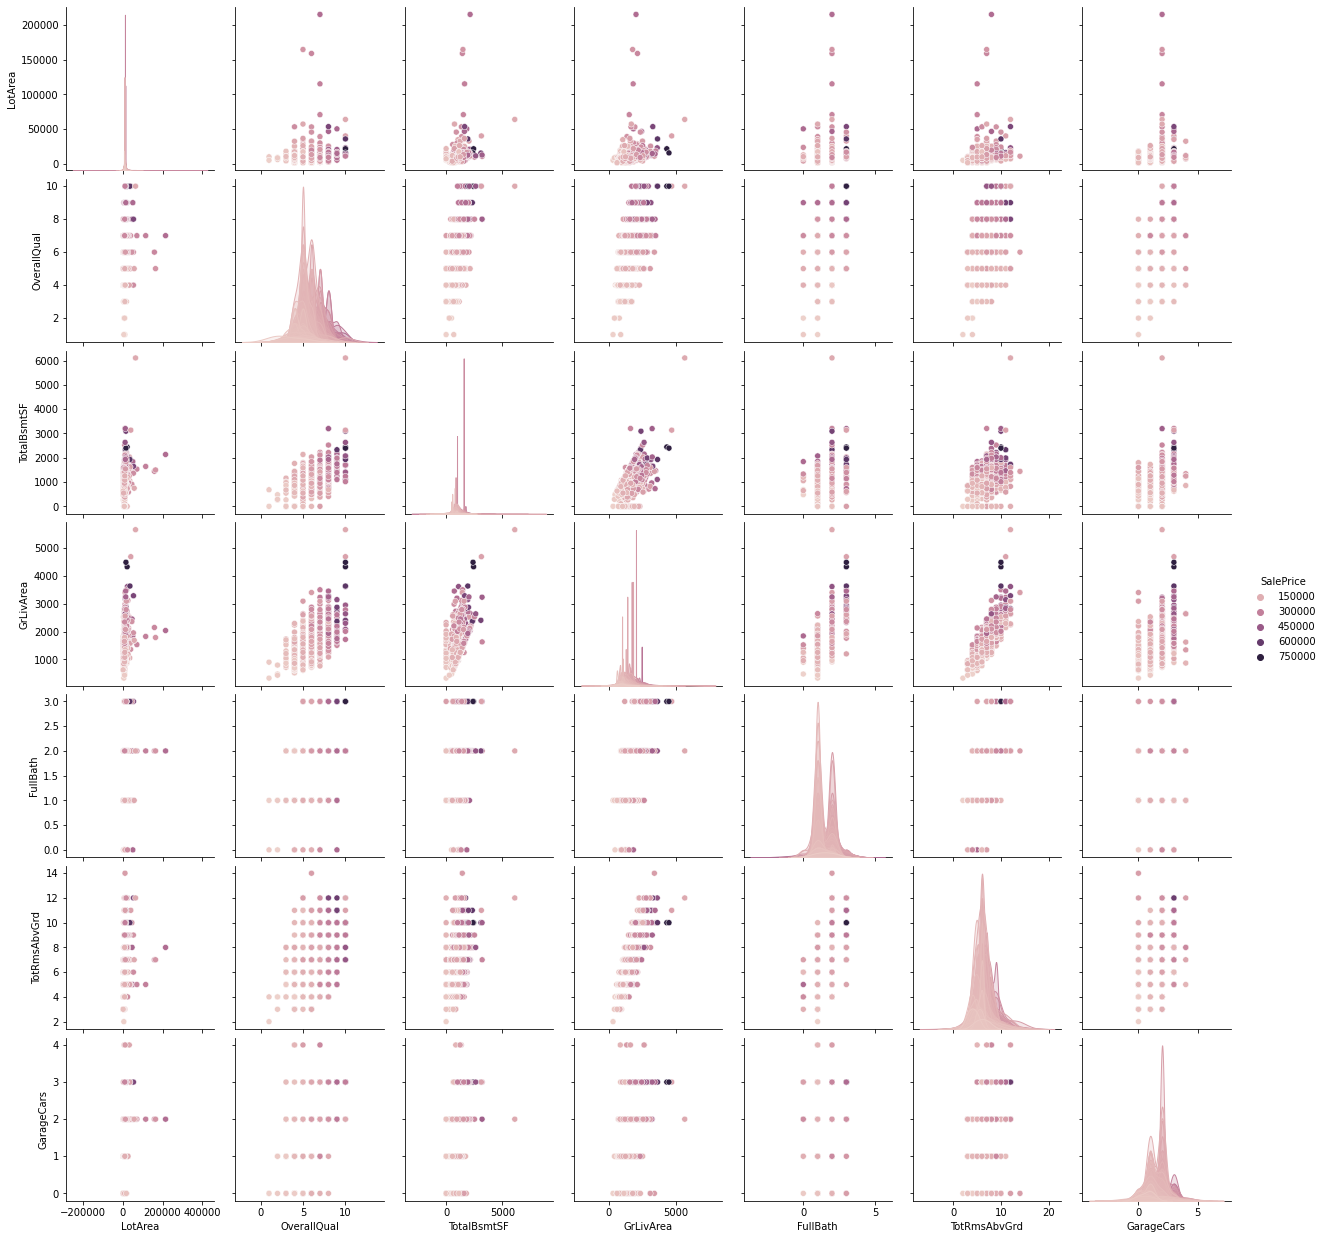

In [111]:
# pairpot with related attributes with sales price
related_attributes = ['LotArea','OverallQual','TotalBsmtSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','SalePrice']
data_plot = train_data[related_attributes]

_ = sns.pairplot(data_plot, hue="SalePrice")

In [159]:
#doing one hot encoding
testData_encoding = test_data.drop('Id', axis=1).copy()
trainData_encoding= train_data.drop(['SalePrice'], axis=1).copy()
# merge Train and test
train_test_data = pd.concat([trainData_Copy,testData_Copy], keys = [0,1])
train_test_data = pd.get_dummies(combined_Data)
# dividing to train and test dataset again 
X_train = train_test_data.xs(0)
X_test = train_test_data.xs(1)
#put target variable saleprice as y_tarin
y_train = train_data["SalePrice"]

print(X_train.shape)
print(X_test.head()) 
print(y_train.shape)

(1460, 274)
   MSSubClass  LotFrontage  ...  SaleCondition_Normal  SaleCondition_Partial
0          20         80.0  ...                     1                      0
1          20         81.0  ...                     1                      0
2          60         74.0  ...                     1                      0
3          60         78.0  ...                     1                      0
4         120         43.0  ...                     1                      0

[5 rows x 274 columns]
(1460,)


In [139]:
# Decision Tree
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)

pd.DataFrame({'Id': test_data.Id, 'SalePrice': clf_predict}).to_csv('submission', index=None)

In [160]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
params = {"max_depth":[15,20,25], "n_estimators":[27,30,33]}
rf_reg = GridSearchCV(rf, params, cv = 10, n_jobs =10)
rf_reg.fit(X_train, y_train)
print(rf_reg.best_estimator_)
rfc_predict = rfc.predict(X_test)
best_estimator=rf_reg.best_estimator_
y_pred_train = best_estimator.predict(X_train)
y_pred_test = best_estimator.predict(X_test)
from sklearn.metrics import mean_squared_error
print('rmse = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train))))
 
pd.DataFrame({'Id': test_data.Id, 'SalePrice': rfc_predict}).to_csv('submission_randomforest', index=None)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=33, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Root Mean Square Error train = 11383.380785570029


In [155]:
# Gradient Boosting Regressor
search_random = {'n_estimators': range(1000, 5000, 100), 'learning_rate':[0.01, 0.1, 0.05]}
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_predict = gbr.predict(X_test)

pd.DataFrame({'Id': test_data.Id, 'SalePrice': gbr_predict}).to_csv('gradientboosting_submission', index=None)

In [ ]:
# params = {'min_samples_split': range(10, 50, 2), 'max_depth': range(10, 50, 5)}
# random = RandomizedSearchCV(abc, params, n_iter=15)
# random.fit(X_train, y_train)
# grid_parms = abc_random.best_params_
# print(grid_parms)
# abc = GradientBoostingRegressor(**grid_parms)
# abc.fit(X_train,y_train)
# abc_predict = abc.predict(X_test)

In [ ]:
# Lasso_reg =Lasso(alpha=0.0005)
# Lasso_reg.fit(x_train,y_train)
# y_predict_train=Lasso_reg.predict(X_train)
# y_predict_test=Lasso_reg.predict(X_test)
# print('RMSE = ' + str(np.sqrt(mean_squared_error(Y_train, y_predict_train))))
